In [3]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!gdown "1F2BxugRqtytQAnudIzvh01fxnzDKzfF8" -O fastfood.csv

Downloading...
From: https://drive.google.com/uc?id=1F2BxugRqtytQAnudIzvh01fxnzDKzfF8
To: /content/fastfood.csv
100% 43.6k/43.6k [00:00<00:00, 32.3MB/s]


In [5]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py

--2023-04-10 18:37:20--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21511 (21K) [text/plain]
Saving to: ‘graphing.py’

graphing.py         100%[===================>]  21.01K  --.-KB/s    in 0s      

2023-04-10 18:37:20 (134 MB/s) - ‘graphing.py’ saved [21511/21511]



## Cargar datos e importar librerías

In [144]:
import pandas as pd
import statsmodels.formula.api as smf
import graphing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv('fastfood.csv',delimiter=',',header='infer', usecols=["total_fat", "total_carb"])
df.head()

,total_fat,total_carb
0,7,44
1,45,62
2,67,63
3,31,62
4,45,81


## Normalización de los datos
Usando el método de mínimo y máximo

In [130]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=["total_fat", "total_carb"])

In [132]:
scaled_df.head()

,total_fat,total_carb
0,0.973684,0.76
1,0.552632,0.64
2,0.210526,0.00
3,0.631579,0.48
4,0.263158,0.36


## Eliminación de puntos atípicos
Se tomó el 20% como mínimo y 80% como máximo del rango a considerar


In [133]:
carb = pd.Series(scaled_df["total_carb"])

carb = carb[carb.between(carb.quantile(.2), carb.quantile(.8))]
print(len(carb))


133


In [134]:
fat = pd.Series(scaled_df["total_fat"])

fat = fat[fat.between(fat.quantile(.2), fat.quantile(.8))]
print(len(fat))

128


In [135]:
frame = {'total_fat': fat,
         'total_carb': carb}
 
df = pd.DataFrame(frame)

In [136]:
df = df.dropna()
df.count()

total_fat     80
total_carb    80
dtype: int64

## Visualización de estimadores estadísticos básicos

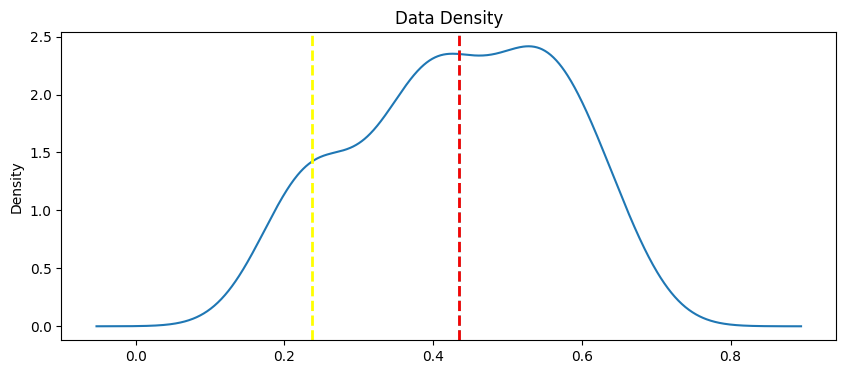

In [146]:
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    var_data.plot.density()

    plt.title('Data Density')

    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    plt.show()

show_density(df['total_fat'])

## Crear el modelo

In [138]:
formula = "total_fat ~ total_carb"

model = smf.ols(formula = formula, data = df)

if not hasattr(model, 'params'):
    print("Model selected but it does not have parameters set. We need to train it!")

Model selected but it does not have parameters set. We need to train it!


## Entrenar el modelo
Identificar los parámetros del modelo: Slope & intercept

In [139]:
fitted_model = model.fit(data=df)

print("The following model parameters have been found:\n" +
        f"Line slope: {fitted_model.params[1]}\n"+
        f"Line Intercept: {fitted_model.params[0]}")

The following model parameters have been found:
Line slope: 0.025297703623347642
Line Intercept: 0.42309226279464573


## Graficación 
Del resultado del modelo

In [140]:
graphing.scatter_2D(df, label_x="total_fat", 
                                label_y="total_carb",
                                trendline=lambda x: fitted_model.params[1] * x + fitted_model.params[0])

## Predicción
Con un muestra ajena al conjunto de datos

In [147]:
total_carb = { 'total_carb' : [0.45] }

approximate_total_fat = fitted_model.predict(total_carb)

print("Estimated approximate_fat:")
print(approximate_total_fat[0])

Estimated approximate_fat:
0.4344762294251522
